In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Industries'), 75, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-04-25 to 2019-07-09 - 62


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats

45


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
GDX,47,2.245197,4.234779,0.520810,22.855766,6.075660
XAR,47,0.849607,1.708340,0.474100,8.858870,2.579733
IHI,47,0.945396,2.058523,0.439982,9.493859,4.510425
GDXJ,47,1.917411,4.698098,0.399678,19.808083,6.657301
IXJ,47,0.620426,1.631821,0.355887,6.264663,3.337207
IGF,47,0.512376,1.391959,0.339588,4.768883,2.242252
XLV,47,0.611817,1.791318,0.319393,6.078724,3.729859
FHLC,47,0.605593,1.800612,0.314288,6.012819,4.334999
VHT,47,0.600727,1.827215,0.307049,5.938262,4.345281


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


evicted IGF 0.819 0.374
evicted FXU 0.861 0.131
evicted EMLP 0.831 0.240
evicted GNR 0.808 0.266
evicted RYT 0.885 0.180
evicted XLU 0.695 0.084
evicted IGV 0.853 -0.004
evicted XLY 0.853 0.109
evicted XLP 0.779 0.068
evicted XLB 0.729 0.268
evicted IYF 0.801 0.003
evicted ARKK 0.772 0.038
evicted ITB 0.614 -0.097
evicted XBI 0.613 0.044
retry backlogs ['VGT', 'VPU', 'VHT', 'IYH', 'VDC', 'VAW', 'VFH', 'FNCL', 'FHLC', 'XLK', 'FTEC', 'VCR', 'IYG', 'IGM', 'XLF', 'VIS', 'GDXJ', 'XT', 'FXL', 'FXH', 'XLV', 'FBT', 'ITA', 'IXN', 'GUNR', 'IBB', 'IXJ'] at 0.905 - 0.638
evicted VPU 0.705 0.279
evicted VDC 0.743 0.037
evicted GUNR 0.830 0.267
evicted VAW 0.784 0.265
evicted VCR 0.822 0.080
evicted XLF 0.779 -0.009
evicted IBB 0.805 0.082
evicted IXJ 0.902 0.081
retry backlogs ['VFH', 'IYH', 'VHT', 'XLV', 'VGT', 'FXH', 'FTEC', 'FXL', 'FHLC', 'GDXJ', 'XT', 'VIS', 'FNCL', 'FBT', 'IXN', 'ITA', 'XLK', 'IGM', 'IYG'] at 0.91 - 0.638
evicted IGM 0.836 0.052
evicted FNCL 0.839 -0.020
evicted FBT 0.887 0.03

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,47.0,1.136947,1.746607,-1.482090,-0.143672,0.705220,1.887440,5.165590,0.628226,11.491539,1.676688
GDX,47.0,2.245197,4.234779,-6.075660,-0.565690,1.289044,4.655249,11.551582,0.520810,22.855766,6.075660
XAR,47.0,0.849607,1.708340,-2.579733,-0.195513,0.562945,2.002551,4.920235,0.474100,8.858870,2.579733
IHI,47.0,0.945396,2.058523,-4.510425,-0.395262,0.585744,2.457314,6.530127,0.439982,9.493859,4.510425
AMLP,47.0,0.246998,1.660142,-3.688932,-0.708170,0.204504,1.215132,4.493211,0.124878,2.218264,4.270103


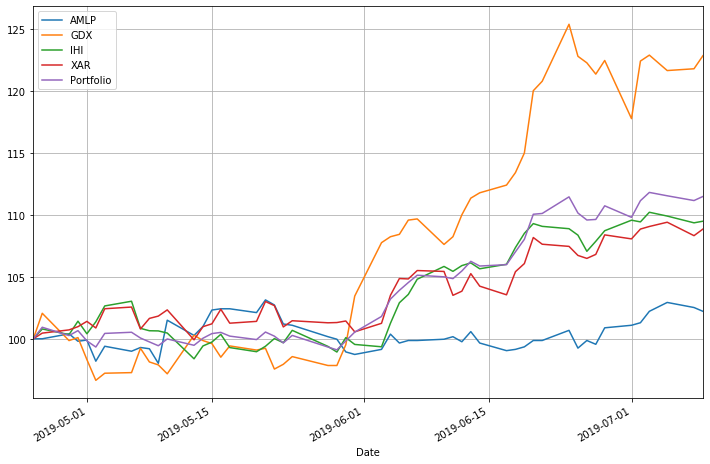

In [4]:
quote.setup_mask(stats.index)
ratio, shrp = quote.optimize_portfolio(.1)
print(ratio, shrp)
quote.setup_mask(ratio)
quote.graph(ratio)